# Análise das Reviews do Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)
reviews = pd.read_json('Automotive_5.json', lines = True)

In [4]:
display(reviews.head())

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,1430438400,NaN,NaN
1,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,It sucks barely picks up anything definitely n...,sucks,1524096000,NaN,NaN
2,1,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},Eduard,"Well to write a short one, it blew 2 fuses of ...",Defective,1523836800,NaN,NaN
3,3,True,"04 13, 2018",A1X77G023NY0KY,0209688726,{'Color:': ' CA'},Lauren,I have absolutely no memory of buying this but...,Looks cool! Probably works,1523577600,NaN,NaN
4,5,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},danny,it ok it does it job,Five Stars,1523145600,NaN,NaN


In [5]:
reviews.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style             1118104
reviewerName          140
reviewText            866
summary               342
unixReviewTime          0
vote              1520651
image             1668825
dtype: int64

## Nuvem de Palavras por Rating

A ideia aqui é analisar qual a nuvem de palavras por nota de acordo com as reviews feitas pelo usuário. Claro que antes será feito um tratamento do texto da review, removendo stopwords, etc. É também interessante saber quantas palavras em média cada rating possui. Note que existem poucas avaliações com reviewText nulo. Nesse caso 

In [24]:
df_analise = reviews[['overall', 'reviewText']]
df_analise = df_analise.dropna()
print('Número de Linhas:', df_analise.shape[0], 'Número de Colunas:', df_analise.shape[1])
df_analise.head()

Número de Linhas: 1710653 Número de Colunas: 2


,overall,reviewText
0,4,"After I wrote the below review, the manufactur..."
1,1,It sucks barely picks up anything definitely n...
2,1,"Well to write a short one, it blew 2 fuses of ..."
3,3,I have absolutely no memory of buying this but...
4,5,it ok it does it job


### Limpeza das palavras

In [25]:
import re

df_analise['reviewText'] = df_analise['reviewText'].apply(lambda x: x.lower()) # Substituindo letras maiúsculas por minúsculas
df_analise['reviewText'] = df_analise['reviewText'].apply(lambda x: re.sub("https?:\/\/.*?[\s+]"," ", x)) # Removendo URLs
df_analise['reviewText'] = df_analise['reviewText'].apply(lambda x: re.sub("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)"," ", x)) # Removendo emails
df_analise['reviewText'] = df_analise['reviewText'].apply(lambda x: re.sub("[^a-zA-Z]"," ", x)) # Filtrando símbolos
df_analise.head()

,overall,reviewText
0,4,after i wrote the below review the manufactur...
1,1,it sucks barely picks up anything definitely n...
2,1,well to write a short one it blew fuses of ...
3,3,i have absolutely no memory of buying this but...
4,5,it ok it does it job


### Separando os dataframes por nota

In [14]:
dfs_por_nota = {
    1: df_analise[df_analise.overall == 1],
    2: df_analise[df_analise.overall == 2],
    3: df_analise[df_analise.overall == 3],
    4: df_analise[df_analise.overall == 4],
    5: df_analise[df_analise.overall == 5],
}

,overall,reviewText
1,1,it sucks barely picks up anything definitely n...
2,1,well to write a short one it blew fuses of ...
13,1,junk the lighter part fell apart out of the box
15,1,excellent suction power for such a small vacuu...
35,1,received took it out of the box attachment p...


### Remoção de Stopwords e criação do CountVectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from pandas import DataFrame 
import matplotlib.pyplot as plt

STOPWORDS.add('one')
STOPWORDS.add('product')
# STOPWORDS.add('work')
# STOPWORDS.add('fit')


NOTA 1:


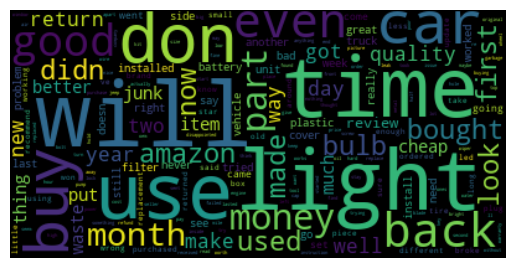

In [46]:
print("NOTA 1:")
df = dfs_por_nota[1]
text = df.reviewText.tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=False, min_word_length=2).generate(text)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

NOTA 2:


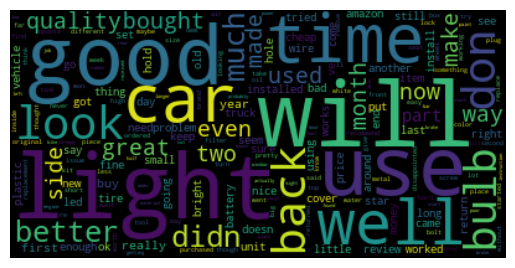

In [47]:
print("NOTA 2:")
df = dfs_por_nota[2]
text = df.reviewText.tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=False, min_word_length=2).generate(text)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

NOTA 3:


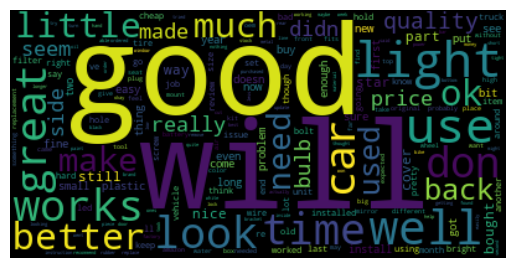

In [48]:
print("NOTA 3:")
df = dfs_por_nota[3]
text = df.reviewText.tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=False, min_word_length=2).generate(text)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

NOTA 4:


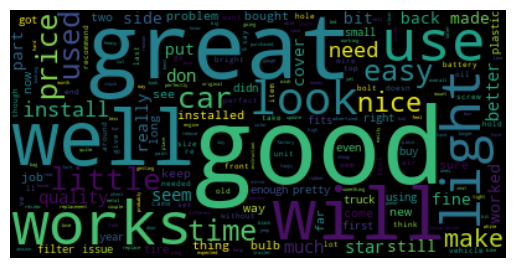

In [49]:
print("NOTA 4:")
df = dfs_por_nota[4]
text = df.reviewText.tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=False, min_word_length=2).generate(text)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [54]:
print("NOTA 5:")
df = dfs_por_nota[5]
text = df.reviewText.tolist()
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=False, min_word_length=2).generate(text)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

NOTA 5:


MemoryError: 